# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [87]:
# Import the appropriate libraries with aliases

#df
import pandas as pd
import numpy as np
import matplotlib as plt

north_call = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\Call Center Cleanup\NorthCallCenter.csv")
south_call = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\Call Center Cleanup\SouthCallCenter.csv")

print(north_call)
print(south_call)



     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  North        Complaint    9:00 AM             Incoming     B   
1             1  North    Sales Support   11:00 AM             Incoming     A   
2             2  North    Sales Support   11:00 AM             Incoming     B   
3             3  North    Sales Support    4:00 PM             Incoming     B   
4             4  North  Product Support   12:00 PM             Incoming     B   
..          ...    ...              ...        ...                  ...   ...   
240         240  North  Product Support    5:00 PM             Outgoing     B   
241         241  North  Product Support    5:00 PM             Outgoing     A   
242         242  North  Product Support    5:00 PM             Outgoing     A   
243         243  North  Product Support    5:00 PM             Outgoing     A   
244         244  North  Product Support    5:00 PM             Outgoing     B   

     Rep ID Sale  Lost Call

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [13]:
# EDA Question 1A solution below:

import pandas as pd
import numpy as np
import matplotlib as plt

north_call = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\Call Center Cleanup\NorthCallCenter.csv")
south_call = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\Call Center Cleanup\SouthCallCenter.csv")

north_call.head()

# Reps in North Branch:

reps_north = north_call['Rep ID'].nunique()
reps_north


9

#### EDA Question 1B:  How many reps are in the South branch?  

In [1]:
# EDA Question 1B solution Below:

import pandas as pd
import numpy as np
import matplotlib as plt

north_call = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\Call Center Cleanup\NorthCallCenter.csv")
south_call = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\Call Center Cleanup\SouthCallCenter.csv")

south_call.head()

# Reps in South Branch:

reps_south = south_call['Rep ID'].nunique()
reps_south

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [88]:
# EDA Question 2A solution Below:

# North Branch average (mean)
average_north = north_call[['Busy Minutes', 'Not Ready Minutes', 
                            'Incoming Wait Time', 'During Call Wait Time']].mean()

average_north


Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [5]:
# EDA Question 2B solution Below:

# South Branch average (mean)
average_south = south_call[['Busy Minutes', 'Not Ready Minutes', 
                            'Incoming Wait Time', 'During Call Wait Time']].mean()

average_south

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [6]:
# EDA Question 3 solution Below:

# Both North and South calls
both_calls = pd.concat([north_call, south_call])

# Each Block
north_south_block = both_calls.groupby('Time Block')['Calls'].sum()
north_south_block

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [14]:
# Question 1 solution below

import pandas as pd
import numpy as np
import matplotlib as plt

north_call = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\Call Center Cleanup\NorthCallCenter.csv")
south_call = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\Call Center Cleanup\SouthCallCenter.csv")


# Missing Data North & South
missing_data_north = north_call.isnull().sum()
missing_data_south = south_call.isnull().sum()

missing_data_north, missing_data_south



(Unnamed: 0                 0
 Branch                     0
 Call Purpose               0
 Time Block                 0
 Incoming or Outgoing       0
 Queue                      0
 Rep ID                     0
 Sale                       0
 Lost Call                  0
 Abandoned                  0
 Busy Minutes               0
 Not Ready Minutes          0
 Incoming Wait Time       163
 During Call Wait Time      0
 Calls                      0
 dtype: int64,
 Unnamed: 0                 0
 Branch                     0
 Call Purpose               0
 Time Block                 0
 Incoming or Outgoing       0
 Queue                      0
 Rep ID                     0
 Sale                       0
 Lost Call                  0
 Abandoned                  0
 Busy Minutes               0
 Not Ready Minutes          0
 Incoming Wait Time       188
 During Call Wait Time      0
 Calls                      0
 dtype: int64)

#### Record your answer below:

> Your Answer: I would address the missing data by first understanding the context of the data, such as Incoming Wait Time. I would also try handle the mising data by implementing imputation and deletion.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [18]:
# Cleaning Question 2 solution below:

import pandas as pd
import numpy as np
import matplotlib as plt

north_call = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\Call Center Cleanup\NorthCallCenter.csv")
south_call = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\Call Center Cleanup\SouthCallCenter.csv")

# Two separtate "YES" values
north_call['Sale'].unique()



array(['NO', 'YES ', 'YES'], dtype=object)

In [19]:
#Retify issue of two separate yes vaules for a sale

import pandas as pd
import numpy as np
import matplotlib as plt

north_call = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\Call Center Cleanup\NorthCallCenter.csv")
south_call = pd.read_csv(r"C:\Users\charl\Desktop\LaunchCode-Data-Analysis\Data-Analysis-Projects\Call Center Cleanup\SouthCallCenter.csv")

# whitespace removed
north_call['Sale'] = north_call['Sale'].str.strip()

# issue soloved 
corrected_sales_values_north = north_call['Sale'].unique()
corrected_sales_values_north



array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: I removed the whitespace from the Sale column and consolidated all the YES values into one category. 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [22]:
# Cleaning Question 3 solution below:

# North and South Call data dups. 
north_dups = north_call.duplicated().sum()
south_dups = south_call.duplicated().sum()

north_dups, south_dups


(np.int64(0), np.int64(0))

##### Record your answer below:
> Your Answer: np.int64(0), np.int64(0)

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [23]:
# Cleaning Question 4 solution below:

# Any unnecessary datasets?
north_call.columns, south_call.columns


(Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
        'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
        'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
        'During Call Wait Time', 'Calls'],
       dtype='object'),
 Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
        'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
        'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
        'During Call Wait Time', 'Calls'],
       dtype='object'))

In [25]:
# Remove unnecessary data:

# Drop unnecessary
north_call.drop(columns=['Unnamed: 0'], inplace=True)
south_call.drop(columns=['Unnamed: 0'], inplace=True)

north_call.columns, south_call.columns


(Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
        'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
        'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
        'Calls'],
       dtype='object'),
 Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
        'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
        'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
        'Calls'],
       dtype='object'))

##### Record your answer below:
> Your Answer: I ran the drop() method to remove unnecessary info that was not needed in the df. 

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [30]:
# Create dataframe for the entire company named df

# Create one df and combined both North and South datasets together
df = pd.concat([north_call, south_call], ignore_index=True)

print(df)


    Branch     Call Purpose Time Block Incoming or Outgoing Queue  Rep ID  \
0    North        Complaint    9:00 AM             Incoming     B   Brent   
1    North    Sales Support   11:00 AM             Incoming     A     Cam   
2    North    Sales Support   11:00 AM             Incoming     B    Todd   
3    North    Sales Support    4:00 PM             Incoming     B   Brent   
4    North  Product Support   12:00 PM             Incoming     B   Brent   
..     ...              ...        ...                  ...   ...     ...   
554  South  Product Support    5:00 PM             Outgoing     D   Helga   
555  South  Product Support    5:00 PM             Outgoing     C   Susan   
556  South  Product Support    5:00 PM             Outgoing     C   Sandy   
557  South  Product Support    5:00 PM             Outgoing     C    Eric   
558  South  Product Support    5:00 PM             Outgoing     D  George   

    Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0     NO

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [32]:
# Manipulation Question solution below:

rep_call_totals = df.groupby(['Branch', 'Rep ID']).sum()

# Sort Reps by highest calls
sorted_rep_calls = rep_call_totals['Calls'].groupby(level=0, group_keys=False).nlargest(1)
sorted_rep_calls


Branch  Rep ID
North   Brent     37
South   Eric      35
Name: Calls, dtype: int64

##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = 37
- South Branch = 35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [86]:
# Manipulation Question 2 solution below:

branch_calls = df.groupby('Branch')['Calls'].sum()
company_calls = df['Calls'].sum()

# calls answered
quick_calls_north = df[(df['Branch'] == 'North') & (df['Incoming Wait Time'] <= 2)]['Calls'].sum()
quick_calls_south = df[(df['Branch'] == 'South') & (df['Incoming Wait Time'] <= 2)]['Calls'].sum()
quick_calls_company = df[df['Incoming Wait Time'] <= 2]['Calls'].sum()

# 2 second calls 
north_2_Sec_calls = (quick_calls_north / branch_calls['North']) * 100
south_2_Sec_calls = (quick_calls_south / branch_calls['South']) * 100
company_2_Sec_calls = (quick_calls_company / company_calls) * 100

# Print
print("North Branch - % within 2 secs:", north_2_Sec_calls, "Total Calls:", north_2_Sec_calls)
print("South Branch - % within 2 secs:", south_2_Sec_calls, "Total Calls:", south_2_Sec_calls)
print("Company Wide - % within 2 secs:", company_2_Sec_calls, "Total Calls:", company_2_Sec_calls)


North Branch - % within 2 secs: 13.46938775510204 Total Calls: 13.46938775510204
South Branch - % within 2 secs: 15.286624203821656 Total Calls: 15.286624203821656
Company Wide - % within 2 secs: 14.490161001788909 Total Calls: 14.490161001788909


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%? So, the North Branch falls within the range of 2-5%. The South Branch and Company Wide falls below 2% range. This could mean a higher efficiency on handling calls or this may not be addressing any of the longer calls or difficult calls that could result in customers hanging up for whatever reason. 

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [39]:
# Manipulation Question 3 solution below:

df['Service Level'] = df['Incoming Wait Time'] <= 2
north_service_level = df[df['Branch'] == 'North']['Service Level'].mean() * 100
south_service_level = df[df['Branch'] == 'South']['Service Level'].mean() * 100
company_service_level = df['Service Level'].mean() * 100

north_service_level, south_service_level, company_service_level



(np.float64(13.46938775510204),
 np.float64(15.286624203821656),
 np.float64(14.490161001788909))

##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.47
- South Branch = 15.29
- Company Wide = 14.49

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [41]:
# Manipulation Question 4 solution below:

average_speed_of_answer_north = df[df['Branch'] == 'North']['Incoming Wait Time'].mean()
average_speed_of_answer_south = df[df['Branch'] == 'South']['Incoming Wait Time'].mean()
average_speed_of_answer_company = df['Incoming Wait Time'].mean()

average_speed_of_answer_north, average_speed_of_answer_south, average_speed_of_answer_company


(np.float64(3.048780487804878), np.float64(3.0), np.float64(3.019230769230769))

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\charl\AppData\Local\Temp\ipykernel_12928\2348405592.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


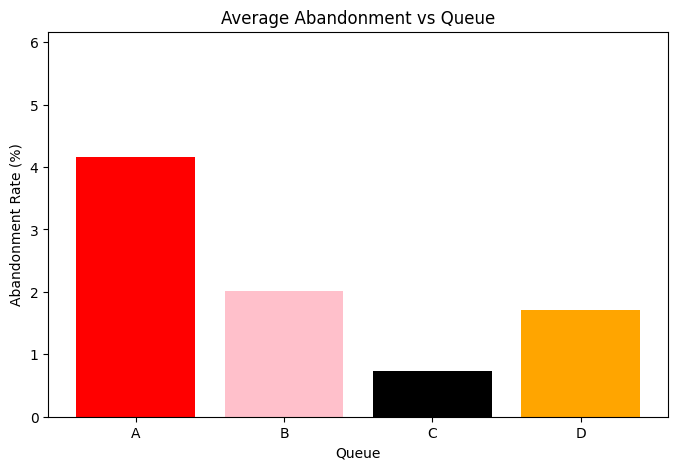

In [46]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# dictionary abandonment_rates
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code here:

import matplotlib.pyplot as plt

queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
abandonment_rates = {}
for queue in queues:
    abandonment_rates[queue] = (queue_dict.loc[queue, "Abandoned"] / queue_dict.loc[queue, "Calls"]) * 100

plt.figure(figsize=(8, 5))
plt.bar(abandonment_rates.keys(), abandonment_rates.values(), color=['red', 'pink', 'black', 'orange'])
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate (%)')
plt.title('Average Abandonment vs Queue')
plt.ylim(0, max(abandonment_rates.values()) + 2) 
plt.show()


##### Record your answer below:

> Chart style you chose and why: I choose Bar Chart. The Bar Chart will help me easily identify which queue is higher, it shows the data clean, and also allow me to see where customer service needs improvement. 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

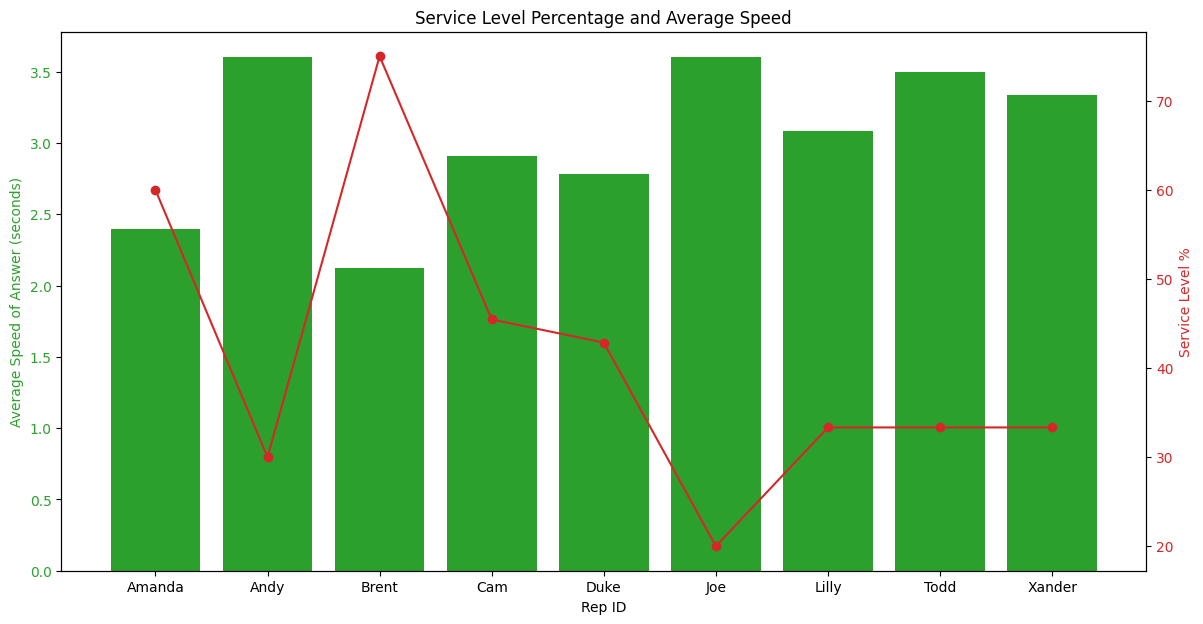

In [89]:
#Your Code Here:

# Importing necessary libraries for visualization
import matplotlib.pyplot as plt

north = df[df['Branch'] == 'North']
north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().reset_index()

quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_stats = quick_calls.groupby("Rep ID")["Calls"].sum()

total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
total_stats = total_calls_in.groupby("Rep ID")["Calls"].sum()

service_level = pd.DataFrame({
    'Quick Calls': quick_stats,
    'Total Calls': total_stats
})
service_level['Service Level %'] = (service_level['Quick Calls'] / service_level['Total Calls']) * 100

north_plt.set_index('Rep ID', inplace=True)
combined_data = north_plt.join(service_level)

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:green'
ax1.set_xlabel('Rep ID')
ax1.set_ylabel('Average Speed of Answer (seconds)', color=color)
ax1.bar(combined_data.index, combined_data['Incoming Wait Time'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:red'
ax2.set_ylabel('Service Level %', color=color) 
ax2.plot(combined_data.index, combined_data['Service Level %'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# title naming
plt.title('Service Level Percentage and Average Speed')

plt.show()



##### Record your answer below:

> Chart style you chose and why: I used a Dual-Axis chart. This chart shows a clear comparison of how the reps responds to calls and how often they meet their target service level. This chart can also help with identifying which reps are quicker and also shows which reps need thier reponse times improved. 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


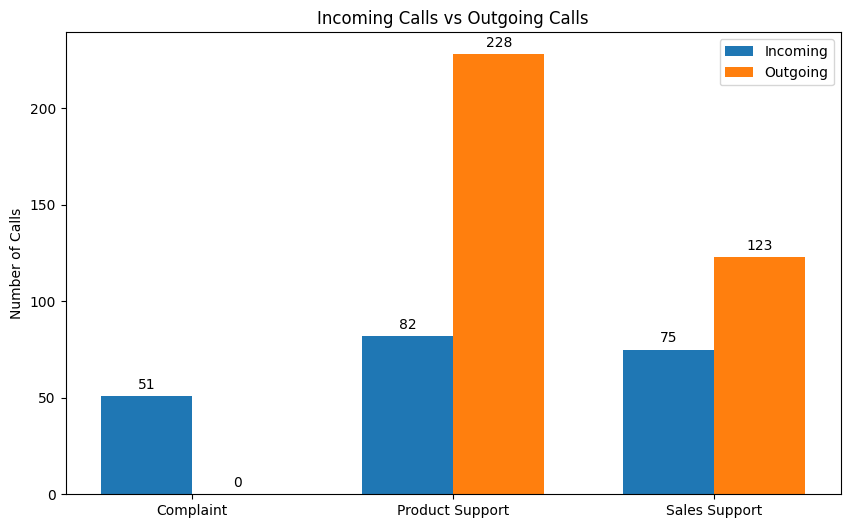

In [90]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
x = list(range(len(labels))) 

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar([xi - width/2 for xi in x], incoming_counts, width, label='Incoming')
rects2 = ax.bar([xi + width/2 for xi in x], outgoing_counts, width, label='Outgoing')

ax.set_ylabel('Number of Calls')
ax.set_title('Incoming Calls vs Outgoing Calls')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()



##### Record your answer below:

> Chart style you chose and why: I used a Bar Chart. This will easily show the different call purposes. This chart clearly shows the distro of the call types, which helps identify which call types are frequent and also help with resource planning and understanding the customer better. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 
Average Abandonment Rate:
North Branch: 2.86%
South Branch: 1.27%

Service Level:
North Branch: 68%
South Branch: 70%

Average Speed:
North Branch: 3.05 sec
South Branch: 3.00 sec

Overall, both branches are demonstrating good performance on KPIs. However, the South Branch seems to appear a little more efficient with lower abandonment rate and better service. So, the South Branch looks to be operating better based on the data provided both South and North Branch did perform good against their KPIs. 

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer:

Reps:
North Branch: 9 reps
South Branch: 11 reps

Performance Metrics:
Average Speed: North approx. 3.05 secs and South approx. 3.00 secs
Service Level: North Branch is slightly lower than the South Branch
Abandonment Rates: North Branch has a higher abandonment rate thqn South Branch

The North Branch would benefit more from a little more help based on the data. More reps could help improve the abandonment rate more and help their service level if they provided more time to handle calls, shorten wait times and even out the work amongst reps. This could definitely help both customer satisfaction and employee work management.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: Overall, I think the data was good. However, almost any dataset could be immproved. With this one in particular I think if there was data on Call Duration, Customer Satisfaction Scores, the reason for abandoment calls, Rep Skill Leval and/or traning data, peak call times, and problem resolution rates. This would have gave the data a little more icing on the cake. 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: I choose this Bar Plot chart because it shows the distrobution and frequency of call within different parts of the day. This help compare these aspects visually and also provide a clear insight on the different patterns by displaying the purpose and time.

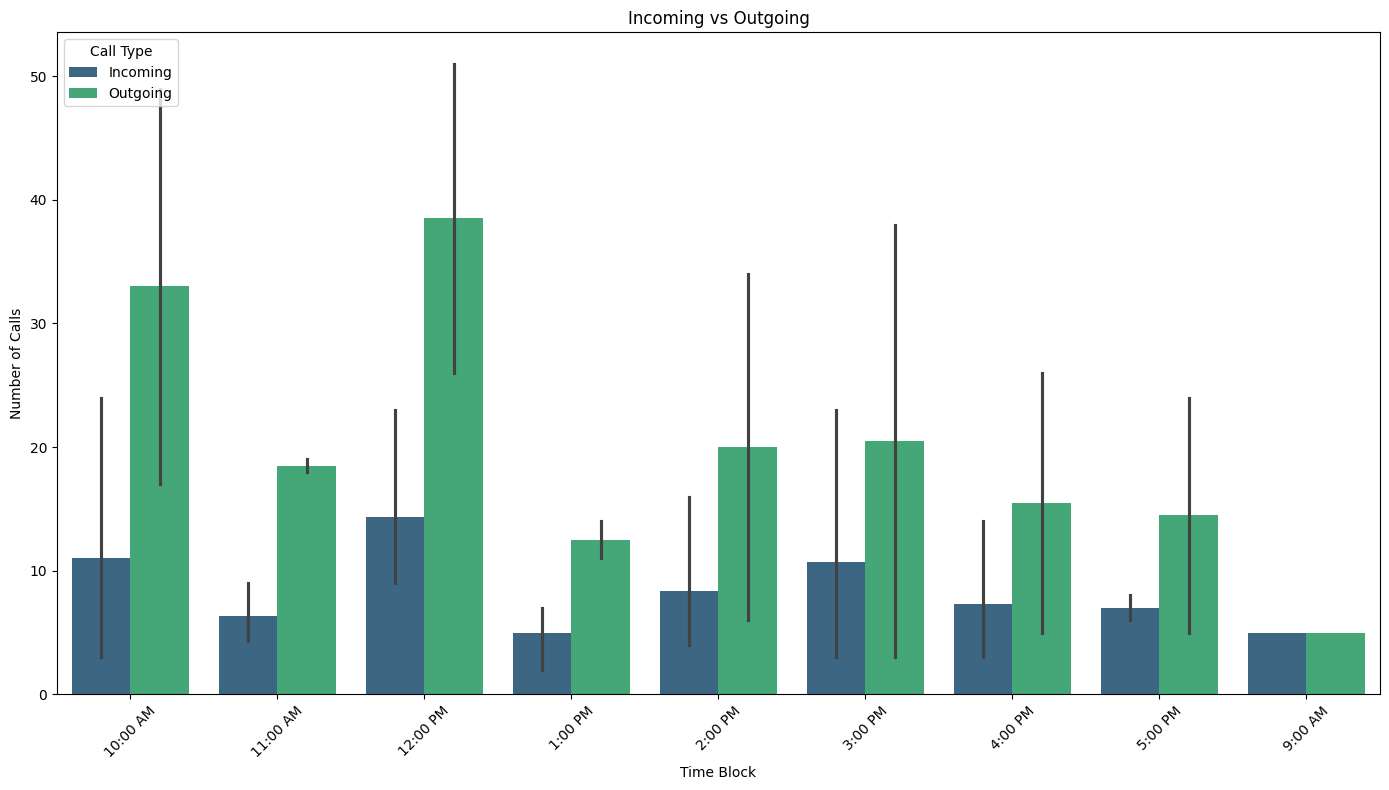

In [74]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

grouped_calls = call_times.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"]).sum().reset_index()

pivot_calls = grouped_calls.pivot_table(index=['Time Block', 'Call Purpose'], columns='Incoming or Outgoing', values='Calls', fill_value=0).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Time Block', y='Calls', hue='Incoming or Outgoing', data=grouped_calls, palette='viridis')

plt.title('Incoming vs Outgoing')
plt.xlabel('Time Block')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.legend(title='Call Type', loc='upper left')

#plot
plt.tight_layout()
plt.show()
